(EvaluationofProperties)=
# Evaluation of Properties

## Pure Substances

```{index} equation of state, pure substance, phase, state property
```

An {ref}`equation of state <genindex>` (EOS) is a mathematical representation describing the relationship between {ref}`state properties <genindex>` of pure substances, such as pressure ($p$), temperature ($T$), specific volume ($v$) and specific internal energy ($u$). State properties, or state variables, are the independent variables that fully describe the state of a system, or the state function. Equations of state can range from very simplistic relationships, such as the ideal gas law, to more complex consisting of hundreds of equations, the results of which are usually tabulated for convenience. Knowing information about any two independent variables fixes the state of the system and the remaining proerties, which can be determined readily with an appropriate equation of state.

A {ref}`pure substance <genindex>` is a substance that has a fixed composition throughout, for example H<sub>2</sub>O or CO<sub>2</sub>. However, it can also be composed of multiple compositions, or chemical elements, as long as they are distributed homogeneously. An example of the latter is air, which is primarily N<sub>2</sub> and O<sub>2</sub> with other trace gases such as CO<sub>2</sub>, Ar, etc. A pure substance can consist of multiple phases, for example boiling H<sub>2</sub>O which is composed of both liquid and vapor.

{ref}`Phase <genindex>` is defined as a pure substance that has a homogeneous physical structure. Physical structure referes to solids, liquids and gases. Note that a fluid is representative of both liquid and gas phases. There are many applications where substances undergo phase transitions and where two or more phases exist in equilibrium.

## Ideal Gas Equation of State

```{index} ideal gas
```

Perhaps the simplist and best known EOS is the {ref}`ideal gas <genindex>` EOS and thus we will use this to introduce evaluation of properties. The ideal gas EOS, or relationship between $T$, $p$ and $v$ (or  $\bar{v}$) of an ideal gas is shown below.

```{math}
:label: eq_a
p\bar{v} = \bar{R}T
```

```{index} universal gas constant
```

This equation of state can be derived from the kinetic theory of gases and assumes zero molecular interaction (e.g. Van der Waals) with molecules that are point center of masses and do not occupy a meaningful volume compared to the total volume of gas. Here, $\bar{R}$ is the {ref}`universal gas constant <genindex>` and is equal to 8.314 $\frac{\rm kJ}{\rm kmol K}$. Keep in mind that the ideal gas law is a very good approximation for many gases, especially at elevated temperatures and volumes, or low pressures, but as temperature and pressure approach their saturation values (discussed later) where molecules tend to become closer together and interact more, other equations of state are more appropriate.

The molar specific volume may be related to the specific volume, $v$, and molecular mass, $M$, with the relationship below.

```{math}
:label: eq_b
\bar{v} =vM
```

```{index} gas constant
```

Also, the {ref}`gas constant <genindex>`, $R$, is defined as.

```{math}
:label: eq_c
R = \frac{\bar{R}}{M}
```

Then, by combining equation {eq}`eq_a` with equations {eq}`eq_b` and {eq}`eq_c`, the ideal gas equation can be rearranged as a function of mass specific variables, $v$ as shown in equation {eq}`eq_d`. 

```{math}
:label: eq_d
Pv = RT = \frac{\bar{R}}{M} T
```

### Using Python to Solve the Ideal Gas EOS

```{index} function
```

Now, we will use Python try and solve for properties ($p$, $v$ (or  $\bar{v}$), or $T$) using the ideal gas EOS. We could simply equate a variable, such as $v$, to $\frac{\bar{R}T}{Mp}$ in a single line of code, like below, assuming $T$, $p$, $M$ and $v$ are defined.

In [1]:
T = 1000 # Temperature in K
M = 16 # Molecular mass of oxygen
p = 100 # pressure in kPa
v = 8.314*T/M/p
print("specific volume is ",v, " m^3/kg")

specific volume is  5.19625  m^3/kg


However, it will prove to be more convenient to use functions when we are plotting or doing more complex calculations, so we will focus on this method. For this we will define {ref}`functions <genindex>` and rearrange the ideal gas EOS to solve explicitly for the property of interest. For example, to solve for pressure we can define pressure as a function of independent variables $T$, $v$ and $M$. Let's define the function *P_ideal* using $def$ and indicate the independent variables in parenthesis. Then, for the function to output the pressure we rearrange equation {eq}`eq_d` to get everything in terms of $p$, and use $return$

In [2]:
def p_ideal(T,v,M):
    return 8.314*T/M/v

#### Example

 Solve for the pressure of Nitrogen (N<sub>2</sub>) gas ($M$ = 28 kg kmol<sup>-1</sup>), knowing the temperature is 500 K and $v$ is .01 m<sup>3</sup> kg<sup>-1</sup>. 

**Solution:** Simply call the function p_ideal and input values  $T$, $v$ and $M$. To display the result the function should be contained within $print$ To change the number of significant digits that are displayed used the  $round$ command. The units are kPa because $\frac{\rm kJ}{\rm kmol K} \frac{\rm kmol}{\rm kg} \frac{\rm K}{\rm m^3}$ reduces to $\frac{\rm kN m}{\rm kg} \frac{1}{\rm m^3}$ which reduces to $\frac{\rm kN}{\rm m^2}$

In [3]:
print(p_ideal(500, .01, 28))
print(round(p_ideal(500, .01, 28),2))

14846.428571428572
14846.43


#### Example

Now, let's solve for the pressure of N<sub>2</sub> gas ($M$ = 28 kg kmol<sup>-1</sup>), knowing the temperature is 500 K and $V$ is .01 m<sup>3</sup> with mass, $m$ equal to 2 kg. 

**Solution:** Simply call the function and input $T$, $v$ and $M$, undestanding that now we should insert the specific volume as $V/m$

In [4]:
print(p_ideal(500, .01/2, 28))
print(round(p_ideal(500, .01/2, 28),2))

29692.857142857145
29692.86


### **Optional** - Learning to use Minimize

```{index} minimize
```

The function $p_{\rm ideal}$ is nice if the goal is to solve for pressure, but it is not useful if solving for a different state property, such as $v$ or $T$. To solve for these other properties it would be necessary to define a second function, for example v_ideal, which is a function of $p$, $T$ and $M$. However, this would quickly become tedius if we were to take this approach for solving all problems of interest. Thus, to make the ideal gas EOS more universal in a Python script, a nice approach would be to create a function that takes the known and unknown variables, and solves for those that are unknown. 

To do this will require a bit more work on the front end because it will be more general than the prior functions. In order to solve for an unknown state variable we will arrange the ideal gas EOS so that everything is equal to zero. Then, knowing two of the three variables we will iterate to solve for the unknown by utilizing a minimizing function. We will write all of our variables into an array, $t$, such that the first index of $t$ is $t[0]$ which is representative of $p$, the second index of $t$ is $t[1]$ which represents $v$, the third index is $t[2]$ which is $T$ and the fourth index is $t[3]$ which is $M$. In Python, the first index of a list is called by referencing 0, the second by 1, and so on. We will also define $R$ by entering it as a function that depends on $M$.

In [5]:
def R(M):
        return 8.314/M

In [6]:
def idealEOS(t):
    return abs(t[0]*t[1]-R(t[3])*t[2]) 

The reason for the $abs$ around the result is that we are going to {ref}`minimize <genindex>` the function idealEOS, where the correct result is equal to zero. However, without the $abs$ the minimize function would try to find a value much less than zero. Don't worry to much right now if you don't quite understand. Now, let's assign values for $p$, $v$ and $M$ for a situation where we are trying to solve for $T$. 

In [7]:
p,v,M = 14500,.01,28

To evaluate the function idealEOS we need to input a list of 4 values, but we don't know temperature. We could guess a value for $T$ and see what the value of the function is, knowing that if we have guessed correctly if the function value approaches zero. For example, if we guess that $T$ = 600 K, our list t would look like the following. 

In [8]:
t = [p,v,600,M]

We can see the value of the function by calling the list t inside the function idealEOS

In [9]:
idealEOS(t)

33.157142857142844

We know that the function should be zero when the value of $T$ is correct. Therefore, 600K is not the correct temperature. At this point we could guess and check $T$ a few times until we converge on the correct value, or plot the function as a function of $T$ . For example, lets observe how the function varies as we change the value of T using $matplotlib$.

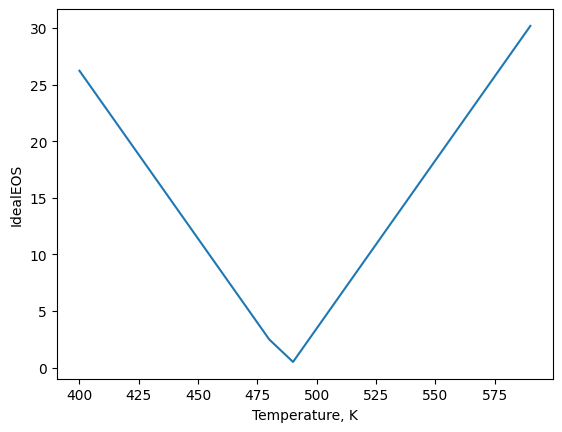

In [10]:
import numpy as np # numpy is a powerful computing package
temps=np.arange(400,600,10) # creates an array of values, from 400 to 600 with a spacing of 10
t=[p,v,temps,M] 
import matplotlib.pyplot as plt # this package allows us to plot functions
plt.plot(temps,idealEOS(t))
plt.xlabel('Temperature, K')
plt.ylabel('IdealEOS')
plt.show()#needed to display plot

Here we can see that the minimum value of the function is near 480 K, which is the correct answer. 

Our goal now is to utilize a minimize function that will iteratively vary the value of $T$ such that the function idealEOS is minimized, to arrive at the same result. In order to use the $minimize$ function in Python we will need to take a few steps. First, we need to define constraints. The constraints will be the known values for $p$,$v$,$T$ and $M$ (you will know 3 of the 4 values, where the fourth is the state variable you are solving for).  We write these as functions called $con1$, $con2$, $con3$ and $con4$. For the constraint $t[0]$ = $p$, in Python this is written as  $p-t[0]$, where $p$ was defined eariler, and so on...

In [11]:
def con1(t):
    return p-t[0]
def con2(t):
    return v-t[1]
def con3(t):
    return T-t[2]
def con4(t):
    return M-t[3]

We also need to give an initial guess for temperature. Lets keep it as 600 K. Thus,

In [12]:
t = [p,v,600,M] # These are our initial guesses

To use the $minimize$ function we will have to import it and then define the constraints that we wish to apply. In this case if we are solving for $T$, our constraints ar $p$, $v$ and $M$, or $con1$, $con2$ and $con4$. These are the first two lines in the coded cell below. Constraints can be equalities or inequalities and we have to indicate they are equalities by defining the 'type' to be 'eq' and then indicating which functions we are using as the constraints. Then, inside the $minimize$ function in the third line we indicate the function we are minimzing ($idealEOS$), the initial guesses ($t$), and the constraints. We  equate the output of the $minimize$ function to $res$. The output we are interested in can be accessed by calling 'x', which gives the value of the array that minmizies the function, under the constraints provided. To see this we type $res.x$ as shown in the fourth line.

In [13]:
from scipy.optimize import minimize # scipy is a powerful scientific computing package
cons = ({'type':'eq', 'fun': con1},{'type':'eq', 'fun': con2},{'type':'eq', 'fun': con4})# Here we formally indicate constraints for minimize function
res=minimize(idealEOS,t,constraints=cons)
res.x

array([1.45000000e+04, 1.00000000e-02, 4.88332932e+02, 2.80000000e+01])

Since we know $T$ is the third value in the list we could have also called $res.x[2]$ on the last line.

In [14]:
res.x[2]

np.float64(488.3329324097054)

Now, lets see what this would look like putting everything together. Lets assume we know $T$ = 500 K, $v$ = 0.01 m<sup>3</sup> kg<sup>-1</sup> for Nitrogen ($M$ = 28 kg kmol<sup>-1</sup>), and we want to solve for pressure, $p$, in $\frac{\rm kN}{\rm m^2}$ or kPa. All we need to do is define our new state variables and $M$, change the initial guess list, t, and change the constraints. We will guess $P$ is equal to 10000 kPa.

In [15]:
#p,v,M = 14500,.01,28
T,v,M = 500,.01,28

t = [10000,v,T,M] # These are our initial guesses

cons = ({'type':'eq', 'fun': con2},{'type':'eq', 'fun': con3},{'type':'eq', 'fun': con4})# Here we formally indicate constraints for minimize function
res=minimize(idealEOS,t,constraints=cons)
res.x

array([1.48464286e+04, 1.00000000e-02, 5.00000000e+02, 2.80000000e+01])

(Matplotlib)=
### Visualizing Results using Matplotlib

```{index} plotting, Matplotlib, arange
```

It can often be beneficial to display results graphically, for example, if you want to visualize how pressure changes with temperature. We saw above a brief example that plotted results of our minimization function using a function called {ref}`Matplotlib <genindex>`. In this section we will discuss in more detail to show how to {ref}`plot <genindex>` functions. To do so we will define pressure as a function of independent variables $T$, $v$ and $M$.

In [16]:
def p_ideal(T,v,M):
    return 8.314*T/M/v

Remember, we can insert arrays of values for $T$,$v$ or $M$, in addition to scalar values. For example, if we want to see how $p$ changes as temperatures varies from 700 K to 900 K, we can create an array for temperatures using the $np.arange$ function, and then insert this array into our function *P_ideal*. Lets assume $v$ = 0.01 m<sup>3</sup> kg<sup>-1</sup> and the gas is Nitrogen ($M$ = 28 kg kmol<sup>-1</sup>)

In [17]:
temps = np.arange(700,900,25)
print(p_ideal(temps,.01,28))

[20785.         21527.32142857 22269.64285714 23011.96428571
 23754.28571429 24496.60714286 25238.92857143 25981.25      ]


As discussed in {numref}`Plotting` {ref}`Plotting`, to plot values using $matplotlib$ it is as simple importing the function $matplotlib.pyplot$, creating lists or arrays of x and y values to be plotted and inserting the lists we wish to plot into the function. For example, lets import $matplotlib$, create a list of x and y values and plot them. 

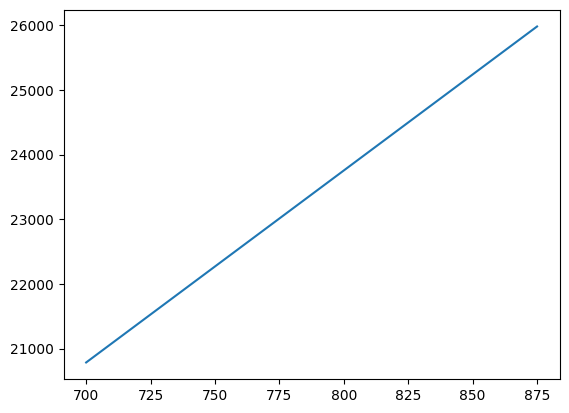

In [18]:
import matplotlib.pyplot as plt
xvals = temps
yvals = p_ideal(temps,.01,28)
plt.plot(xvals,yvals)
plt.show()

There are numerous ways to make the plots look more customized, by changing the font type, size, colors, aspect ratios, tick marks, etc. But, this is outside the scope of this exercise. For now let's just label the x and y axis by using the functions $xlabel$ and $ylabel$.

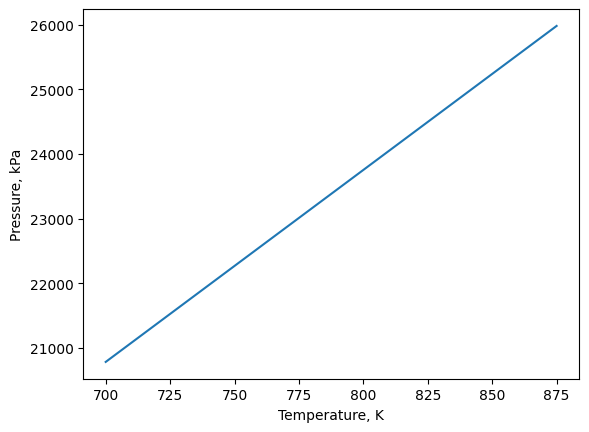

In [19]:
plt.plot(xvals,yvals)
plt.xlabel('Temperature, K')
plt.ylabel('Pressure, kPa')
plt.show()

### **Optional** - Lists and Plotting Using Output From Minimize

As seen, inputting an array of values into a function generates a resulting array of values. However, it is not possible to input a list or array of values into the $minimize$ function. Thus, if we want to solve for multiple state variables using minimize, we would need to loop over the mimimize function and append the output to a list. For example, if we wanted to use the same array of temps and solve for pressure we could do the following.

In [20]:
cons = ({'type':'eq', 'fun': con2},{'type':'eq', 'fun': con3},{'type':'eq', 'fun': con4})# Here we formally indicate constraints for minimize function

pres=[] #here we define an empty list for pressures that we will append results to during each loop
for i in temps: #this loops from temp[0] to temp[1], etc
    T,v,M = i,.01,28
    t = [10000,v,i,M] # These are our initial guesses
    res=minimize(idealEOS,t,constraints=cons)
    pres.append(res.x[0])
print(pres)

[np.float64(20785.000000529493), np.float64(21527.32142816202), np.float64(22269.642857129387), np.float64(23011.964284286223), np.float64(23754.285713875357), np.float64(24496.607139730266), np.float64(25238.928575756574), np.float64(25981.250000011623)]


Then we can plot the same way as above.

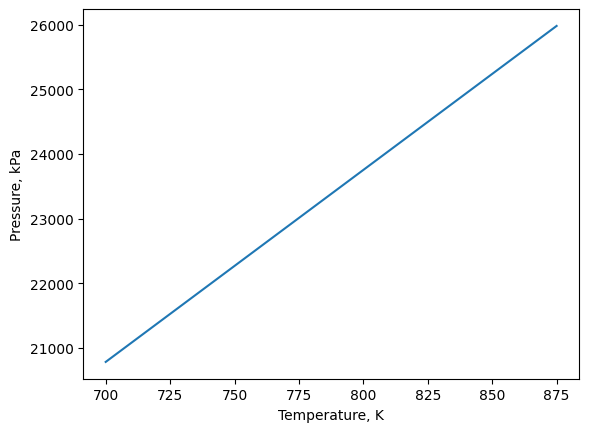

In [21]:
xvals = temps
yvals = pres
plt.plot(xvals,yvals)
plt.xlabel('Temperature, K')
plt.ylabel('Pressure, kPa')
plt.show()

(Exercise1)=
### Exercise 1

1. A mass of 0.1 kg of helium (He, $M$<sub>He</sub> = 4 $\frac{\rm kg}{\rm kmol}$) at 500 kPa is contained within a 0.4 m<sup>3</sup> rigid tank. The tank is
heated until the pressure is 700 kPa. Calculate the temperature change of helium (in K) as a result of this heating.

1. A rigid tank contains 3 kg of nitrogen (N<sub>2</sub>) at 35°C and 150 kPa. 

    1. Determine the specific volume ($v$) and absolute volume ($V$) using the ideal gas law. For this calculation define a function their function through rearrangement of 

    1. Determine the specific volume ($v$) and absolute volume ($V$) using the ideal gas law and a minimizing function.

    1. Does the specific volume of the nitrogen change with temperature or pressure?

    1. Plot the pressure as a function of temperature between 0°C and 500°C with and without using a minimizing function.

    1. Now imagine it is connected to a second tank through a valve with volume 1m<sup>3</sup> also containing N<sub>2</sub> at 10°C and 450 kPa. The valve is opened, and
        the entire system is allowed to reach thermal equilibrium with the surroundings, which are at 25°C. Determine the final equilibrium pressure of N<sub>2</sub>.

1. A frictionless piston–cylinder contain 5 kg of nitrogen at 100 kPa and 250 K. The system is compressed until it reaches a final temperature of 450 K.  Assume the compression occurs according to to the relation $pV^2$ = constant. 

    1. Calculate the volume and pressure after compression.

    1. Plot the pressure as a function of volume during the compression process.


{numref}`Exercise1Solutions` {ref}`Exercise1Solutions`

## Phase Transitions, Other Equations of State and Cantera 

There are several other, relatively simple, equations of state that can more accurately describe the $P$,$v$,$T$ relationship of pure substances by, for example, taking into account intermolectular interactions that become important at higher $P$, lower $T$ or lower $v$. In general, the approach to solving for state properties with these other EOS is conceptually similar to using the ideal gas EOS described above. These relatively simple equations can usually work well for gases but should not be used for two phase substances (e.g., liquid-vapor mixtures), or substances that are near the phase transition points or critical points. In these situtations, more complicated equations of state must be used that are computationally difficult to solve, and typically software have been developed to perform these computations, or values are tabulated. To solve for properties of pure substances that are not ideal we will take advantage of the Cantera package in Python that has complex equations of state for many pure substances - thus,  reaching into the appendices of your thermodynamics textbook and interpolating or extrapolating values from tables will not be necessary! But before we get there, a bit more background on phase changes will be discussed.

```{index} phase transition, compressed liquid, saturated liquid, saturated mixture, saturated vapor, superheated vapor, saturated temperature
```

There are many situations where pure substances undergo a {ref}`phase transition <genindex>`, where two or more phases can co-exist in equilibrium. For example, H<sub>2</sub>O is a well known molecule that we have experience with as either solid, liquid, vapor, or a mixture of these depending on its temperature and pressure. Imagine heating liquid H<sub>2</sub>O contained in a vertically oriented piston-cylinder device, where the piston is free to move, as shown in {numref}`Figure %s <eval fig a>`. Initially, at the temperature where heating begins (State 1), if we were to add an incremental amount of heat and it were remain a liquid (State 2), it is called a {ref}`compressed liquid <genindex>`. Thus, the compressed liquid region is where a liquid is not about to vaporize. During this heat addition, the temperature will increase but there is very little change in the specific volume. If heat is added until the point where the addition of any more heat would cause it to vaporize, or boil, this is referred to as a {ref}`saturated liquid <genindex>` (State 3).  For H<sub>2</sub>O, at ambient pressure of 1 bar, this occurs near 100 °C. After this point, as heat continues to be added to the system, H<sub>2</sub>O begins to vaporize and change phase and forms a {ref}`saturated mixture <genindex>`, composed of both liquid and vapor (State 4). During this phase transition, the temperature remains constant, but the specific volume increases as the fraction of vapor increases. If more heat is added just until the last fraction of liquid has vaporized (or the point where vapor is about to condense), it is referred to as a {ref}`saturated vapor <genindex>` (State 5). Then, as more heat is added, the specific volume continues to increase along with temperature and in this region is referred to as a {ref}`superheated vapor <genindex>` (State 6). The temperature at which a fluid transitions from liquid to vapor, or vapor to liquid, at a specified pressure is referred to as the {ref}`saturated temperature <genindex>` ($T_{\rm sat}$).The pressure at which a fluid transitions from liquid to vapor, or vapor to liquid at a specified temperature is referred to as the {ref}`saturated pressure <genindex>` ($P_{\rm sat}$).

```{figure} Figures/phase_transition.png
---
name: eval fig a
---
From left to right - the phase transition of H<sub>2</sub>O from a compressed liquid to superheated vapor in a piston cylinder that is free to move.
```

During the entire heating process described above, if the mass of the piston is constant and the external pressure is constant, then the pressure contained within the cyclinder can be assumed to remain constant as it rises during heating. This is an idealized approximation but a good one as long as the expansion (or contraction) occurs very slowly, or reversibly, as we will learn about in later chapters. We can see this from a force balance on the piston ({numref}`Figure %s <eval fig b>`), where:

$\sum F = 0$

thus, $\sum F_{\rm up} = \sum F_{\rm down}$

thus, $p_{\rm ext}A_{\rm piston} + m_{\rm piston}g = p_{\rm int}A_{\rm piston}$, where $p_{\rm ext}$ is the pressure external to the piston, typically atmospheric and assumed constant, $A_{\rm piston}$ is the cross-sectional area of the piston which is constant, $m_{\rm piston}$ is the piston mass which is constant, $g$ is the acceleration due to gravity which is constant and $p_{\rm int}$ is the pressure inside the piston-cylinder.

thus, $p_{\rm int} =  {\rm Constant}$

```{figure} Figures/piston_force_balance.png
---
name: eval fig b
---
A simplified view of the internal and external forces acting on a piston during expansion or compression. The downwards acting forces are due to the external pressure and mass of the piston, while the upwards acting forces are a result of the internal pressure in the cylinder.
```

### Using Cantera to Evaluate Properties

```{index} Cantera
```

As mentioned, it would not be suitable to use the ideal gas EOS to determine property values during the aforementioned heating process, except in the superheated region far away from the saturated vapor points - see further discussion below in {numref}`IdealGasCompare` {ref}`IdealGasCompare`. Typically, tabulated values calculated from more complex equations of state would be used, coupled with interpolation and extrapolation which can be both tedius and introduce error. To avoid this and to enable evaluation easily within our Python scripts, we will use {ref}`Cantera <genindex>` (As mentioned in {numref}`Cantera` {ref}`Cantera`), a Python package useful for evaluating properties of pure substances that can evaluate EOS's with relative ease. 

Let's use Cantera to show how the specific volume and temperature change during the phase transition of H<sub>2</sub>O at constant pressure, as exemplified by the piston-cylinder example above in {numref}`Figure %s <eval fig a>`. At this point, you should have already installed the Cantera package. Be sure to navigate to the correct environment in anaconda - refer to {numref}`Cantera` {ref}`Cantera`). Import cantera and define a species as H<sub>2</sub>O, like below.

In [22]:
import cantera as ct
species1 = ct.Water()# define species1 as water

We will start by assuming the process begins at ambient pressure (100 kPa) and temperature (298.15 K), and that the entire heating process occurs at constant pressure. To calculate property values, we will need to know any two independent properties (more on this later) and this will fully define the state of our system. For example, we can define the temperature and pressure as follows to fix the state of our system.

In [23]:
species1.TP = 273.15+25, 100000 #Redefine Temperature in K and Pressure in Pa at State 1

And after the state is fixed, we can determine the specific volume by calling $species1$ preceded by $.PV[1]$. Without the addition of $[1]$ both the pressure and specific volume would be displayed, as shown in the first line of code below. The $[1]$ ensures that we only select the second value in the list, or specific volume, as shown in the second line of code below.

In [24]:
species1.PV # will output a list of the pressure in Pa and specific volume in m^3 per kg

(99999.99997029465, 0.0010028874407073288)

In [25]:
species1.PV[1] #will output only specific volume in m^3 per kg

0.0010028874407073288

If you are unsure of the units you can always type the species name followed by parenthesis in an empty cell, like below. As seen, units for density are shown as $\frac{\rm kg}{\rm m^3}$, and specific volume therefore has the inverse of this, or $\frac{\rm m^3}{\rm kg}$

In [26]:
species1()


  water:

       temperature   298.15 K
          pressure   1e+05 Pa
           density   997.12 kg/m^3
  mean mol. weight   18.016 kg/kmol
    vapor fraction   0
   phase of matter   liquid

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -1.5866e+07       -2.8584e+08  J
   internal energy       -1.5866e+07       -2.8584e+08  J
           entropy            3887.3             70034  J/K
    Gibbs function       -1.7025e+07       -3.0672e+08  J
 heat capacity c_p            4182.4             75350  J/K
 heat capacity c_v            4139.6             74579  J/K



As mentioned, we need to provide two independent properties to fully define the state of our system and determine other state properties. However, temperature and pressure are not always independent, for example in the phase change region. This is because during a phase change temperature and pressure remain constant, while specific volume increases. Therefore, constraining only $T$ and $P$ in the region where the phase is changing does not provide enough information to determine specific volume or other state properties. Therefore, rather than defining temperature and pressure, we can alternatively define pressure and specific volume to calculate the corresponding temperature, like below. 

In [27]:
species1.PV = 100000,.001003 # Redefine pressure in Pa at State 1 and specific volume

In [28]:
species1.TV # we can see the temperature is nearly 298.15, but not exactly, with differences due to rounding

(298.5856144896108, 0.001003)

Now, lets calculate a range of temperatures during the heating process in the piston-cylinder by defining a range of volumes where it is to be calculated. To do this, we can create a list of specific volumes, ranging from .001003 to 2, like below.

In [29]:
vols = np.arange(0.001003,2,.00001)

Then, we can determine temperature at each of these volumes by iterating through the list of volumes, setting the pressure and volume at each iteration and appending the resulting temperature to a new list.

In [30]:
temps=[] # create an empty list called temps
for i in vols: # iterate over each value in vols, i.e. .001003,.0010013,.0010023, etc
    species1.PV = 100000,i # set the pressure and ith volume
    temps.append(species1.TV[0]) # append the temperature value (species1.TV[0]) at the specified pressure and volume to the temps list   

```{index} vectorize
```

The reason we needed to iterate is that we can only evaluate temperature with a single volume, not a list or array of values. Cantera will not accept anything but scalar inputs, unlike functions which can also accept a list of values. Understandably, if iterating using loops at this point is a bit intimidating, we can alternatively take advantage of a function called {ref}`vectorize <genindex>` within the numpy package. By using the vectorize function we can input a list of values, or volumes in this case, rather than only one at a time. To do this we first need to define a function that we call $temps$ below. Right now this would only accept a single scalar value as it's input

In [31]:
def temp(vol):
    species1.PV = 100000,vol
    return species1.TV[0]

However, to enable this function to accept an array of values, we then $vectorize$ it by including the function $temps$ in the function $np.vectorize$, and calling this $tempsvector$.

In [32]:
tempsvector=np.vectorize(temp)

The result is the same as using the iterative approach above. Try for yourself by inputing  an array of volumes into tempsvector. See below.

In [33]:
test_vols = np.arange(0.01,.05,.01)
tempsvector(test_vols)

array([372.80884382, 372.80884382, 372.80884382, 372.80884382])

```{index} plotting, Matplotlib
```

Now, we can plot the resulting $temps$ list as a function of $vols$ list, like below and as we did above in {numref}`Matplotlib` {ref}`Matplotlib`. The basic plotting is the same but we have added some annotations, which you can see by calling the ".annotate" function.

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_15723/3770111974.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$v$ $(\mathrm{m^3} \mathrm{kg^{-1}})$',  fontsize=12)
/tmp/ipykernel_15723/3770111974.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$T$ $({\mathrm{K})}$',  fontsize=12)
/tmp/ipykernel_15723/3770111974.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.annotate('Saturated Liquid Point, $v_\mathrm{f}$', (0,375), (0.15,400), arrowprops=dict(color='orange', shrink=0.05), fontsize=12)
/tmp/ipykernel_15723/3770111974.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.annotate('

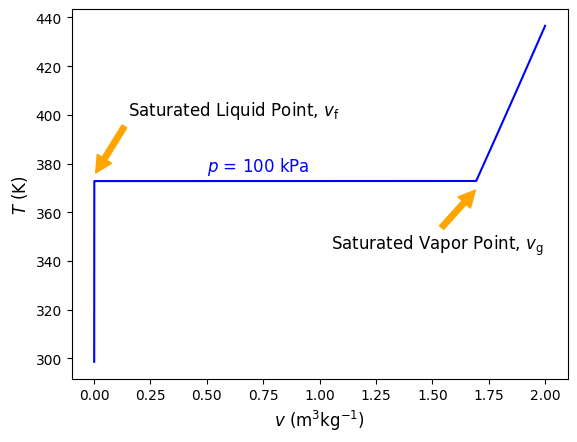

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(vols,temps,color='blue')
plt.xlabel('$v$ $(\mathrm{m^3} \mathrm{kg^{-1}})$',  fontsize=12)
plt.ylabel('$T$ $({\mathrm{K})}$',  fontsize=12)
plt.annotate('Saturated Liquid Point, $v_\mathrm{f}$', (0,375), (0.15,400), arrowprops=dict(color='orange', shrink=0.05), fontsize=12)
plt.annotate('Saturated Vapor Point, $v_\mathrm{g}$', (1.70,370), (1.05,345), arrowprops=dict(color='orange', shrink=0.05), fontsize=12)
plt.annotate('$p$ = 100 kPa', (0.5,377), color='Blue', fontsize=12)
plt.savefig('Figures/sat_liquid_vapor.png')# used to save the figure if you desire
plt.show()

```{figure} Figures/sat_liquid_vapor.png
:name: properties fig a

Temperature versus specific volume at constant pressure of 100 kPa. Notice how temperature remains constant during the phase transition, between the saturated liquid point and saturated vapor point.
```

The saturated liquid and saturated vapor points, where the phase transition begins and ends, can be seen above and as mentioned prior, temperature remains constant in this region. We can see that ($T_{\rm sat}$) is about 373 K (it is exactly 372.76 K) at 100 kPa. Thus, ($P_{\rm sat}$) is 100 kPa at a temperature of 372.76 K. The specific volume of a saturated liquid, denoted by the symbol $v_\rm f$, and the specific volume of a saturated vapor by $v_\rm g$. Notice that the specific volume in the compressed liquid region is for the most part independent of temperature.

### Quality

```{index} quality
```

At this point, it makes sense to introduce a new, intensive thermodynamic property called {ref}`quality <genindex>` ($x$), which is a measure of the fraction of vapor in the system. Thus, quality can range from 0 at the saturated liquid point to 1 at the saturated vapor point. Mathematically, quality is defined as the mass of vapor ($m_\rm {vapor}$) relative to the total mass($m$), or:

```{math}
:label: eq_e
x = \frac{m_\rm {vapor}}{m_\rm {total}}
```

Quality is related to $v$, $v_\rm f$ and $v_\rm g$. This can be derived by understanding that the total volume of the system ($V$) is composed of liquid and vapor, or $V_\rm f$ and $V_\rm g$. Therefore:

```{math}
:label: eq_e
V = V_\rm f + V_\rm g
```

```{math}
:label: eq_f
m v = m_\rm f v_\rm f + m_\rm g v_\rm g
```

```{math}
:label: eq_g
v = (1-x)v_\rm f + xv_\rm g
```

```{math}
:label: eq_h
v = x(v_\rm g-v_\rm f)+v_\rm f
```

In Cantera, we can set or call the quality of a species in the two phase region by following the $species1$ with $.PQ$ or $.TQ$ where $Q$ is the quality, or vapor fraction. For example, lets set the quality to 0 and 1 at a pressure of 100 kPa and read out temperature and specific volume. 

In [35]:
species1.PQ = 100000,0
species1.TV

(372.8088438181153, 0.0010432439474862992)

In [36]:
species1.PQ = 100000,1
species1.TV

(372.8088438181153, 1.694166798232878)

```{index} critical pressure, critical temperature, supercritical fluid, saturation dome
```

As seen, the outputs compare well with the $T-v$ diagram above. Now lets construct a series of saturation points at different pressures using this new tool. We will vary our calculations from 10 kPa to 22.06 MPa. The reason for selecting 22.06 MPa is that this is right below the {ref}`critical pressure <genindex>` ($P_{\rm crit}$) for H<sub>2</sub>O. The critical pressure is the point at which, when the pressure is increased beyond it, the substance becomes a {ref}`supercritical fluid <genindex>`. Likewise, the {ref}`critical temperature <genindex>` ($T_{\rm crit}$), which occurs at $P_{\rm crit}$ (and vice versa) is the point at which, when the temperature is increased beyond it, the substance becomes a {ref}`supercritical fluid <genindex>`.  A supercritical fluid is one in that is neither liquid or vapor, and in this higher pressure range there is no phase change that occurs. Lets construct the list of pressures like below.

In [37]:
pres = np.arange(10000,22060000,10000) # pressure in Pa

Then, lets calulate the associated saturated fluid specific volumes ($v_{\rm f}$ and $v_{\rm g}$) and saturated temperatures ($T_{\rm sat}$) at each pressure. To do this we will again iterate over each pressure and set the quality to 0 when we calculate $v_{\rm f}$ and 1 when we calculate $v_{\rm g}$. To determine the saturated temperature we can use either quality (or anything in between), since this is constant in the saturated region. We will break these calculations down into three separate cells for visualization purposes below, but of course they could all be done within the same loop. Lets first calculate the $v_{\rm f}$ values.

In [38]:
vfs=[] # create an empty list called vfs that will store our saturated fluid volumes at the different pressures
for i in pres: # iterate over each value in pres, i.e. 10000,20000,30000, etc
    species1.PQ = i,0 # set the ith pressure and quality of 0 to get saturated fluid values
    vfs.append(species1.TV[1]) # append the vf value (species1.TV[1]) at the specified pressure and quality to the vfs list

Then lets calculate $v_{\rm g}$ values.

In [39]:
vgs=[] # create an empty list called vgs that will store our saturated vapor volumes at the different pressures
for i in pres: # iterate over each value in pres, i.e. 10000,20000,30000, etc
    species1.PQ = i,1 # set the ith pressure and quality of 1 so we can get saturated vapor values
    vgs.append(species1.TV[1]) # append the vg value (species1.TV[1]) at the specified pressure and quality to the vgs list

Then lets calculate $T_{\rm sat}$ values. Remember, we can use any quality between 0 and 1 - we will use 0.

In [40]:
sattemps = [] # create an empty list called sattemps that will store our saturated temperatures the different pressures
for i in pres: # iterate over each value in pres, i.e. 10000,20000,30000, etc
    species1.PQ = i,0 # set the ith pressure and quality of 0 to get saturated values
    sattemps.append(species1.TV[0]) # append the saturated temperature value (species1.TV[0]) at the specified pressure and quality. The quality could have been anything between 0 and 1 because T_sat remains constant

Then, we can plot the resulting $sattemps$ list as a function of the $vfs$ and $vgs$ lists, like below. The basic plotting is the same as before but instead of calling $plt.plot()$ we have used $plt.semilogx()$ in order to show the x-values in log scale.

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_15723/1448736236.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$v$ $(\mathrm{m^3} \mathrm{kg^{-1}})$',  fontsize=12)
/tmp/ipykernel_15723/1448736236.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$T$ $({\mathrm{K})}$',  fontsize=12)
/tmp/ipykernel_15723/1448736236.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.annotate('Saturated Fluid Volumes, $v_\mathrm{f}$', (0.0011,400), (0.002,350),color='blue', arrowprops=dict(color='blue', shrin

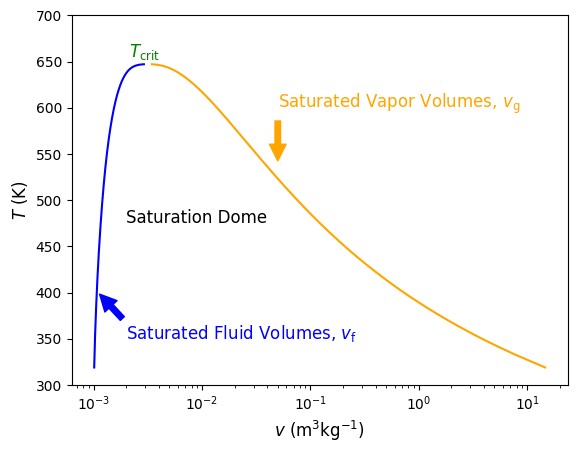

In [41]:
import numpy as np
import matplotlib.pyplot as plt
plt.semilogx(vfs,sattemps,color='blue')
plt.semilogx(vgs,sattemps,color='orange')
plt.ylim([300, 700])
plt.xlabel('$v$ $(\mathrm{m^3} \mathrm{kg^{-1}})$',  fontsize=12)
plt.ylabel('$T$ $({\mathrm{K})}$',  fontsize=12)
plt.annotate('Saturated Fluid Volumes, $v_\mathrm{f}$', (0.0011,400), (0.002,350),color='blue', arrowprops=dict(color='blue', shrink=0.05), fontsize=12)
plt.annotate('Saturated Vapor Volumes, $v_\mathrm{g}$', (.05,540), (0.05,600), color='orange', arrowprops=dict(color='orange', shrink=0.05), fontsize=12)
plt.annotate('Saturation Dome', (0.002,475), fontsize=12)
plt.annotate('$T_{\mathrm{crit}}$', (0.0021,655),  color='green', fontsize=12)
# plt.annotate('$T_{\mathrm{crit}}$', (0.0031,650), (0.0007,675), color='green', arrowprops=dict(color='green', shrink=0.005), fontsize=12)
plt.savefig('Figures/sat_dome.png')# used to save the figure if you desire
plt.show()

```{figure} Figures/sat_dome.png
:name: properties fig b

Temperature versus specific volume along the saturation dome. On the left in blue are saturated fluid points and on the right in orange are saturated vapor points. The formation of the points represents the saturation dome, beneath which everything is a saturated liquid-vapor mixture. On top of the dome is the critical point.
```

Everything inside of the {ref}`saturation dome <genindex>` is a saturated mixture. To the left, the fluid is a compressed fluid, to the right a superheated fluid, and above a supercritical fluid. At the critical pressure ($P_{\rm crit}$) of 22.06 (top of the dome), $T$  = $T_{\rm crit}$ = 644 K. In general, as pressure increases $T_{\rm sat}$ increases, as shown in the green constant pressure lines of 100 kPa, 1 MPa and 10 MPa on the $T-v$ diagram in {numref}`Figure %s <properties fig c>` below. 

<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:47: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:47: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_15723/3324521175.py:46: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$v$ $(\mathrm{m^3} \mathrm{kg^{-1}})$',  fontsize=12)
/tmp/ipykernel_15723/3324521175.py:47: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$T$ $({\mathrm{K})}$',  fontsize=12)


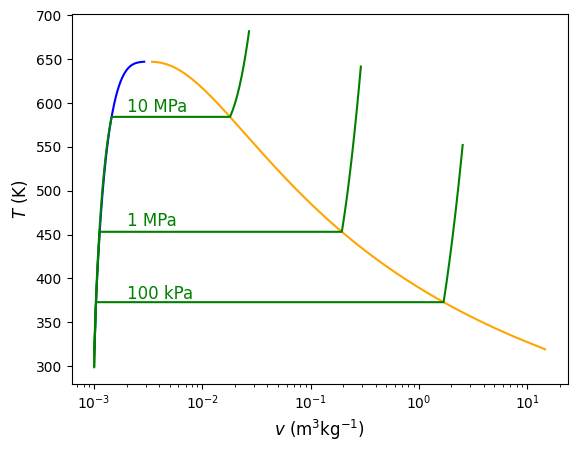

In [42]:
pres = [100000*10**x for x in range(3)]
vf=[] # create an empty list called vf that will store our saturated fluid volumes at the different pressures
sattemp=[] # create an empty list called sattemp that will store our saturated temperatures at the different pressures
for i in pres: # iterate over each value in pres, i.e. 100000,1000000,etc
    species1.PQ = i,0 # set the ith pressure and quality of 0 to get saturated fluid values
    vf.append(species1.TV[1]) # append the vf value (species1.TV[1]) at the specified pressure and quality to the vfs list
    sattemp.append(species1.TV[0]) # append the sat. temp value (species1.TV[0]) at the specified pressure
vg=[] # create an empty list called vg that will store our saturated fluid volumes at the different pressures
for i in pres: # iterate over each value in pres, i.e. 10000,100000,etc
    species1.PQ = i,1 # set the ith pressure and quality of 1 to get saturated vapor values
    vg.append(species1.TV[1]) # append the vg value (species1.TV[1]) at the specified pressure and quality to the vgs list

vols=[] # create an empty list called vols
for i in pres:
    vols.append([]) # create a list of lists within vols to hold volumes at each pressure
for i in range(len(pres)):
    vols[i]=np.arange(0.001003,vf[i],.00001)
    
for i in range(len(vols)):
    vols[i] = list(vols[i])+list(np.arange(vf[i],vg[i],.001))
    
for i in range(len(vols)):
    vols[i] = list(vols[i])+list(np.arange(vg[i],1.5*vg[i],.001))
    
temps=[] # create an empty list called temps
for i in pres:
    temps.append([]) # create a list of lists within temps to hold temperatures at each pressure

k=0
for i in pres:
    for j in vols[k]: # iterate over each value in vols
        species1.PV = i,j # set the pressure and ith volume
        temps[k].append(species1.TV[0]) # append the temperature value (species1.TV[0]) at the specified pressure and volume to the temps list
    k=k+1
    
import numpy as np
import matplotlib.pyplot as plt
plt.semilogx(vfs,sattemps,color='blue')
plt.semilogx(vgs,sattemps,color='orange')
for i in range(len(vols)):
    plt.semilogx(vols[i],temps[i],color='green')

plt.annotate('100 kPa', (0.002,377), color='Green', fontsize=12)
plt.annotate('1 MPa', (0.002,460), color='Green', fontsize=12)
plt.annotate('10 MPa', (0.002,590), color='Green', fontsize=12)
plt.xlabel('$v$ $(\mathrm{m^3} \mathrm{kg^{-1}})$',  fontsize=12)
plt.ylabel('$T$ $({\mathrm{K})}$',  fontsize=12)
plt.savefig('Figures/sat_dome_pressures.png')# used to save the figure if you desire
plt.show()

```{figure} Figures/sat_dome_pressures.png
:name: properties fig c

Temperature versus specific volume with multiple constant pressure lines shown. As pressure increases the saruration temperature also increases, until the critical point is reached. In the compressed liquid region, specific volume is largely independent of pressure and assumed to be incompressible.
```

(LiquidApproximation)=
### Liquid Approximation and Incompressibility

```{index} incompressible fluid, liquid approximation
```

Notice that in the compressed liquid region on the left hand side of the saturation dome, the specific saturated fluid volumes ($v_{\rm f}$) in blue are nearly indistinguishable from the compressed liquid specific volumes that are green at all at different pressures - indeed they all appear to overlap. While there are very small differences, they are not observable at this scale. Because of the very small differences in $v$ as pressure changes in the compressed liquid region, we can often assume that specific volume is a function of temperature only - i.e. $v$ at some given $P$,$T$ = $v$ at the same $T$ but different pressure. In this region it is referred to as an {ref}`incompressible fluid <genindex>`. In addition to specific volume, we can also assume that specific internal energy ($u$, discussed next chapter in {numref}`FirstLaw` {ref}`FirstLaw`)  is a function of temperature only - i.e. $u$ at some given $P$,$T$ = $u$ at the same $T$ but different pressure. We can verify with some simple calculations.

In [43]:
import cantera as ct
species1 = ct.Water()# define species1 as water
species1.TP = 298,100000
species1.PV[1] # specific volume

0.001002849132867957

In [44]:
species1.TP = 298,1000000 # increasing the pressure by 1 order of magnitude
species1.PV[1] # specific volume, nearly identical to above

0.001002438215634586

This is especially useful in regions where compressed liquid data is not available, often at lower pressures.

Also, if we only know saturated properties we can use this to help us determine properties in the compressed region, i.e., $v$ at some given $P$,$T$ = $v_{\rm g}$ at the same $T$. For example:

In [45]:
species1.TP = 298,1000000 # P = 1 MPa
species1.PV[1] # specific volume

0.001002438215634586

In [46]:
species1.TQ = 298,0 # Set quality to be 0 at the same temperature of 298 K
species1.PV # pressure and specific volume

(3134.055266591048, 0.001002893444924276)

As seen, at 298 K and $x$ = 0, $v_{\rm g}$ = 0.001, which is nearly the same as at 1MPa but at a much lower pressure of $P_{\rm sat}$  =  3.134 kPa.

(IdealGasCompare)=
### Ideal Gas Law Comparison

Now that we have learned how to evaluate properties of real substances using Cantera, and properties assuming gas ideality, lets explore the superheated vapor region of some candidate gases (H<sub>2</sub>O, CO<sub>2</sub>, N<sub>2</sub>, etc.) to see how well the ideal gas law describes their $p-v-T$ dependence. Lets start with H<sub>2</sub>O. We will use Cantera to help us determine the specific volume of H<sub>2</sub>O at 100 kPa as a function of temperature, starting from the saturated vapor point.

In [47]:
species1.PQ = 100000,1 # Set quality to be 1 at 100000 kPa
vg=species1.PV[1] # v_g at 100
v=np.arange(vg, 3*vg,.3) # generate list of specific volumes at which to calculate temperatures
T=[] # define a blank list that will hold temperature values
for i in v: # iterate over volumes
    species1.PV = 100000,i # set pressure and volume, at each iteration of volume
    T.append(species1.TP[0]) #solve for temperature at set pressure and volume

Now lets also calculate the associated temperatures using ideal gas law EOS.

In [48]:
P=100 #set pressure to be 100 kPa
M = 18 # molecular weight of H2O
def T_ideal(P,v,M):
    return (P*v)/(8.314/M)
Tideal=T_ideal(P,v,M) #calculated at 100 kPa and each volume, "v" from cell above

Now lets plot the difference in temperatures between values calculated using Cantera and the ideal gas law EOS, shown in {numref}`Figure %s <properties fig d>`.

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_15723/1468324816.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.annotate('$v_{\mathrm{g}} $ @ 100 kPa', (1.71,6),(2,5.6), color='Green', arrowprops=dict(color='green', shrink=0.05), fontsize=12)
/tmp/ipykernel_15723/1468324816.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$v$ $(\mathrm{m^3} \mathrm{kg^{-1}})$',  fontsize=12)
/tmp/ipykernel_15723/1468324816.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta T$ $({\mathrm{K})}$',  fontsize=12)


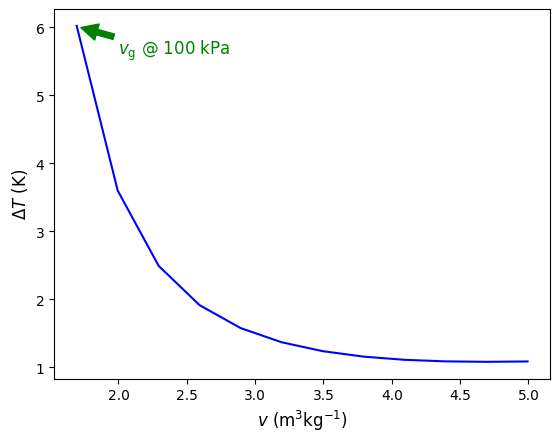

In [49]:
import matplotlib.pyplot as plt
plt.plot(v,T-Tideal,color='blue')

plt.annotate('$v_{\mathrm{g}} $ @ 100 kPa', (1.71,6),(2,5.6), color='Green', arrowprops=dict(color='green', shrink=0.05), fontsize=12)
plt.xlabel('$v$ $(\mathrm{m^3} \mathrm{kg^{-1}})$',  fontsize=12)
plt.ylabel('$\Delta T$ $({\mathrm{K})}$',  fontsize=12)
plt.savefig('Figures/dT_ideal.png')# used to save the figure if you desire
plt.show()

```{figure} Figures/dT_ideal.png
:name: properties fig d

Temperature difference ($T_{\rm real}$-$T_{\rm ideal}$) versus specific volume calculated at 100 kPa for H<sub>2</sub>O. As the volume approaches $v_{\rm g}$ the ideal gas EOS becomes less appropriate to use.
```

The difference increases as the saturation point is approached. In addition, the difference becomes magnified for calculations at higher pressures. For example, {numref}`Figure %s <properties fig e>` below compares $T$ verses $v$ in the superheated region of H<sub>2</sub>O at 100 l kPa, 1 MPa, and 10 MPa. Green lines are computed using Cantera and blue lines using ideal gas law EOS. As seen, at high pressure and low specific volume, temperature estimates are as much as 200 K different. Thus, as can be seen from these results, it is NOT recomended to assume ideal gas behavior for H<sub>2</sub>O unless there is a high degree of confidence that the pressure is low enough, or volume/temperature are large enough. For other gases, such as N<sub>2</sub>, O<sub>2</sub>, Ar, He, etc that all have very low saturation temperatures, it is typical to assume ideal gas behavior under most $T-p-v$. CO<sub>2</sub>, like H<sub>2</sub>O, has regions where it behaves non-ideally and others where ideal gas assumptions are usually fine. We will see in the excercises below some examples of this.

<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:47: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:47: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_15723/2195804014.py:46: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$v$ $(\mathrm{m^3} \mathrm{kg^{-1}})$',  fontsize=12)
/tmp/ipykernel_15723/2195804014.py:47: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$T$ $({\mathrm{K})}$',  fontsize=12)


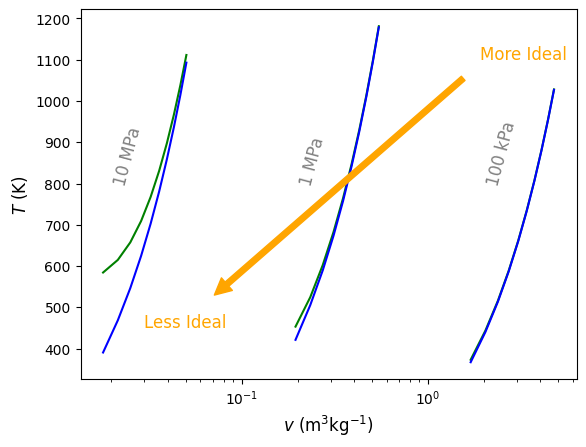

In [50]:
pres = [100000*10**x for x in range(3)]
vg=[] # create an empty list called vg that will store our saturated vapor specific volumes at the different pressures
for i in pres: # iterate over each value in pres, i.e. 10000,100000,etc
    species1.PQ = i,1 # set the ith pressure and quality of 1 to get saturated vapor values
    vg.append(species1.TV[1]) # append the vg value (species1.TV[1]) at the specified pressure and quality to the vgs list


vols=[] # create an empty list called vols
for i in pres:
    vols.append([]) # create a list of lists within vols to hold volumes at each pressure
    
for i in range(len(pres)):
    vols[i]=np.arange(vg[i], 3*vg[i],(3*vg[i]-vg[i])/10) # create a list of lists of vols
    
temps=[] # create an empty list called temps
for i in pres:
    temps.append([]) # create a list of lists within temps to hold temperatures at each pressure

k=0
for i in pres:
    for j in vols[k]: # iterate over each value in vols
        species1.PV = i,j # set the pressure and ith volume
        temps[k].append(species1.TV[0]) # append the temperature value (species1.TV[0]) at the specified pressure and volume to the temps list
    k=k+1
    
    
tempsideal=[] # create an empty list called temps
M = 18 # molecular weight of H2O
def T_ideal(P,v,M):
    return (P/1000*v)/(8.314/M)
k=0
for i in pres:
    tempsideal.append(T_ideal(i,vols[k],M))
    k=k+1
    
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
for i in range(len(vols)):
    ax1.semilogx(vols[i],temps[i],color='green')
    ax1.semilogx(vols[i],tempsideal[i],color='blue')
plt.annotate('100 kPa', (2,800), color='Gray', rotation = 75,fontsize=12)
plt.annotate('1 MPa', (.2,800), color='Gray', rotation = 75,fontsize=12)
plt.annotate('10 MPa', (.02,800), color='Gray', rotation = 75,fontsize=12)
plt.annotate('More Ideal', (.06,500), (1.9,1100), arrowprops=dict(color='orange', shrink=0.05),color='orange', fontsize=12)
plt.annotate('Less Ideal', (.03,450), color='orange', fontsize=12)
plt.xlabel('$v$ $(\mathrm{m^3} \mathrm{kg^{-1}})$',  fontsize=12)
plt.ylabel('$T$ $({\mathrm{K})}$',  fontsize=12)
plt.savefig('Figures/T_ideal_multiple_P.png')# used to save the figure if you desire
plt.show()

```{figure} Figures/T_ideal_multiple_P.png
:name: properties fig e

Temperature of real ($T_{\rm real}$) and ideal ($T_{\rm ideal}$) H<sub>2</sub> shown in green and blue, respectively, at  100 kPa,  1 MPa  and  10 MPa. As pressure increases and volume decreases, the ideal gas EOS becomes less appropriate to use.
```

(Exercise2)=
### Exercise 2

1. Using Cantera, determine the specific volume ($v$) of water vapor where $p$ = 8 bar and $T$ = 200 $^\circ$C. What about $T$ = 220 $^\circ$C? 

1. What is the composition (compressed, saturated, superheated) and pressure of H<sub>2</sub>O with $v$ =  65 m<sup>3</sup> kg<sup>-1</sup> and T = 15 $^\circ$C? What is the quality, x (if applicable)? Use Cantera to solve.

1. What is the composition (compressed, saturated, superheated) and temperature of H<sub>2</sub>O with $v$ =  1 m<sup>3</sup> kg<sup>-1</sup> and $p$ = 0.5 MPa? What is the quality, x (if applicable)? Use Cantera to solve.

1. What is the composition (compressed, saturated, superheated) and pressure of H<sub>2</sub>O with $v$ =  1 m<sup>3</sup> kg<sup>-1</sup> and T =  150 $^\circ$C? What is the quality, x (if applicable)? Use Cantera to solve.

1. A rigid tank contains 50 kg of saturated liquid water at 90 $^\circ$C. Determine the pressure in the tank and the tank volume.

1. Compare the specific volume of nitrogen (N<sub>2</sub>) at 35°C and 150 kPa using the ideal gas law and Cantera. In Cantera us ct.Nitrogen() rather than ct.Water() as we have been for H<sub>2</sub>O.

1. The critical pressure of CO<sub>2</sub> is 7.38 MPa. Although it is often okay to assume CO<sub>2</sub> is an ideal gas at near ambient conditions, it is not okay to assume so at higher pressures.
    1. Determine $v_{\rm f}$ and $v_{\rm g}$ of CO<sub>2</sub> at 5 MPa.
    
    1. What is the saturated temperature of CO<sub>2</sub> at 5 MPa?
    
    1. Compare the specific volume of CO<sub>2</sub> at 5 MPa at saturated vapor conditions using Cantera and the ideal gas law at the same $T_{\rm sat}$ and $P_{\rm sat}$. In Cantera us ct.CarbonDioxide() rather than ct.Water() like we did for H<sub>2</sub>O.
    
    1. Plot specific volume  from the saturated vapor point at 5 MPa to 5 times $v_{\rm g}$ at the same pressure.  Use both Cantera and the ideal gas EOS.

1. A 2.1 m<sup>3</sup> rigid tank contains steam at 230°C. One-half of the volume is in the liquid phase and the rest is in the vapor form. Using Cantera, determine:

    1. the pressure of the steam,
    
    1. the quality of the saturated mixture, and 
    
    1. the density of the mixture.

1. What is the specific volume of water at 5 MPa and 100°C? What would it be if the incompressible liquid approximation were used? Use Cantera to solve.

1. Water initially at 200 kPa and 300°C is contained in a piston–cylinder device fitted with stops, State 1. 

    1. The water is allowed to cool at constant pressure until it exists as a saturated vapor and the piston rests on the stops, State 2. Determine the change in specific volume during the process. Use Cantera to solve.
    
    1. Then the water continues to cool at constant volume until the pressure is 100 kPa, State 3. What is the temperature at State 3? Use Cantera to solve.
    
1. One kilogram of water fills a 150-L rigid container at an initial pressure of 2 MPa. The container is then cooled to 40°C. Determine the initial temperature and the final pressure of the water. Use Cantera to solve.

1. A piston–cylinder device contains 0.6 kg of steam at 300°C and 0.5 MPa. Steam is cooled at constant pressure until one-half of the mass condenses. 

    1. Determine the final temperature. Use Cantera to solve.
    
    2. Determine the change in volume. Use Cantera to solve.
    
1. 10 kg of R-134a fill a 1.115-m3 rigid container at an initial temperature of –30°C. The container is then heated until the pressure is 200 kPa. Determine the final temperature and the initial pressure.

1. 1 kg of R-134a fills a 0.14 m3 weighted piston cylinder device at -26.4 °C. The container is now heated until the temperature is 100 °C. Determine the final volume of the R-134a.

{numref}`Exercise2Solutions` {ref}`Exercise2Solutions`